# **이륜차 교통사고, Feature 별 사망률 기여도 분석**


***


## <font color = 'gold'>1 Ask</font>

### 1) Problem Definition

각 feature이 이륜차 운전자 사고 사망에 미치는 영향을 분석해본다.

### 2) Background

1. 나도 이륜차가 있다. 토크가 끝내주는 KTM사의 Duke 390 2020년 형을 탄다. 하지만 이륜차는 사고시 자동차에 비하여 안전에 취약하다. 본인은 오래 살고 싶다. 어떤 요소들에 신경을 쓰면서 라이딩을 해야 즐겁고 안전한 바이크 문화시민이 될 수 있을지 고민하는 차원에서 분석을 해보고자 한다.
2. 차종은 배기량 125cc 이상의 오토바이를 뜻하는 "이륜차"로 한정한다. 기타 차종들은 이륜차와 운행 형태(속도, 사용목적 등) 및 환경(예를 들어 사륜차 도심 외곽에서 주로 운행된다) 많이 다르기 때문이다.

## <font color = 'gold'>2 Prepare</font>

### 1. Tools

In [9]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from datetime import datetime
import missingno as msno
import pandas_profiling
from pandas_profiling import ProfileReport

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')
import folium
from folium import plugins
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


# matplot/seaborn 한글 폰트
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rcParams['font.family'] = 'Noto Sans CJK KR'
plt.rcParams.update({'font.size': 13})



### 2. Acquire data 

데이터는 국가 공공데이터포털 "도로교통공단_이륜차(원동기장치자전거, 사륜ATV 포함) 개별 교통사고 정보" (https://www.data.go.kr/data/15094149/fileData.do)를 사용한다. </p>
** 이륜차(원동기장치자전거, 사륜ATV 포함) 개별 교통사고 정보(2012~2019년)

In [10]:
%pwd

'c:\\Users\\persi\\Desktop\\서웅\\DataScience\\Portfolio\\Python\\[Project 1] Features causing Motorcycle Accident Deaths'

In [11]:
# windows
data = pd.read_csv('C:/Users/persi/Desktop/서웅/DataScience/DATA SCIENCE/vscode/Test/Projects/Actual/data.csv', encoding='cp949')

In [12]:
# mac
# data = pd.read_csv('/Users/seowoongchu/Desktop/DATASCIENCE/Test-1/Projects/Actual/3. Motorcycle Death Causes/data.csv', encoding='cp949') # 한글 encoding

## <font color = 'gold'>3 Process</font>

### 3. Get to know the data

#### 1) Basics

In [13]:
data.columns

Index(['발생일', '발생시간', '주야', '요일', '사고내용', '발생지_시도', '발생지_시군구', '사고유형_대분류',
       '사고유형_중분류', '사고유형', '가해자면허경과년수', '가해자법규위반', '가해자성별', '가해자연령',
       '가해자신체상해정도', '가해차종', '가해차량용도_대분류', '가해차량용도_중분류', '가해차량용도', '가해Y여부',
       '가해자음주농도', '가해자보호장구', '가해자보호장구_착용여부', '피해자성별', '피해자연령', '피해자신체상해정도',
       '피해차종', '피해차량용도_대분류', '피해차량용도_중분류', '피해차량용도', '도로종류', '도로형태_대분류',
       '도로형태', '도로선형_대분류', '도로선형_중분류', '도로선형', '교차로형태_대분류', '교차로형태',
       '노면상태_대분류', '노면상태', '기상상태', '어린이보호구역여부', '사망자수', '중상자수', '경상자수',
       '부상신고자수'],
      dtype='object')

In [14]:
data.head()

In [ ]:
data.info()
print('_'*40)
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146126 entries, 0 to 146125
Data columns (total 46 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   발생일           146126 non-null  object
 1   발생시간          146126 non-null  object
 2   주야            146126 non-null  object
 3   요일            146126 non-null  object
 4   사고내용          146126 non-null  object
 5   발생지_시도        146126 non-null  object
 6   발생지_시군구       146126 non-null  object
 7   사고유형_대분류      146126 non-null  object
 8   사고유형_중분류      146126 non-null  object
 9   사고유형          146126 non-null  object
 10  가해자면허경과년수     146126 non-null  object
 11  가해자법규위반       146126 non-null  object
 12  가해자성별         146126 non-null  object
 13  가해자연령         146126 non-null  object
 14  가해자신체상해정도     146126 non-null  object
 15  가해차종          146126 non-null  object
 16  가해차량용도_대분류    146126 non-null  object
 17  가해차량용도_중분류    146126 non-null  object
 18  가해차량용도        146126 non

,발생일,발생시간,주야,요일,사고내용,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,...,교차로형태_대분류,교차로형태,노면상태_대분류,노면상태,기상상태,어린이보호구역여부,사망자수,중상자수,경상자수,부상신고자수
count,146126,146126,146126,146126,146126,146126,146126,146126,146126,146126,...,146126,146126,146126,146126,146126,146126,146126.000000,146126.000000,146126.000000,146126.000000
unique,2922,24,2,7,4,17,209,4,18,21,...,3,6,2,7,6,2,NaN,NaN,NaN,NaN
top,2019-05-06,18:00,주,토,경상,서울,북구,차대차,측면충돌,측면충돌,...,교차로아님,교차로아님,포장,건조,맑음,N,NaN,NaN,NaN,NaN
freq,90,12014,76003,22895,69910,35276,4671,103154,52023,52023,...,76279,76279,145824,132092,130445,145510,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.032321,0.372979,0.645388,0.187742
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.180302,0.540518,0.720520,0.412478
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,0.000000


<AxesSubplot:>

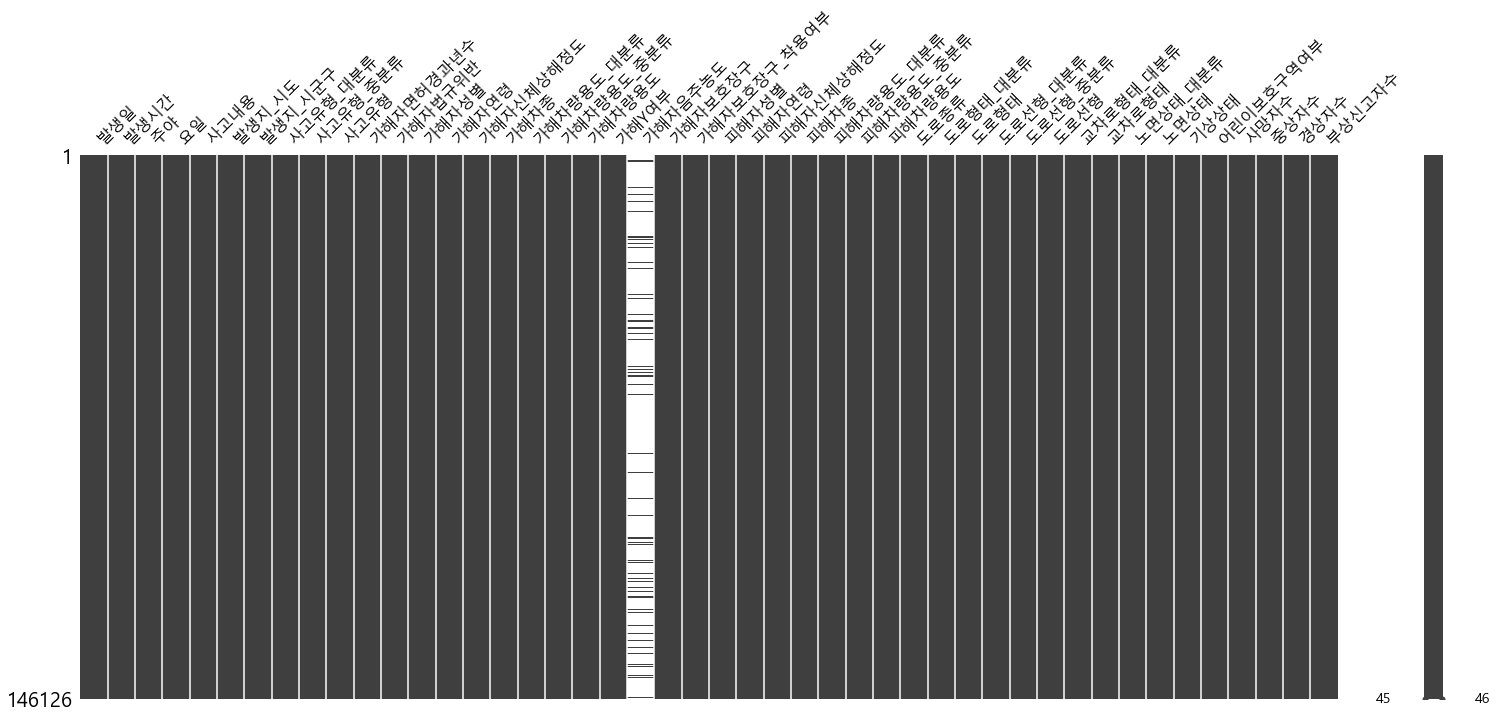

In [ ]:
msno.matrix(data)

In [ ]:
pd.isnull(data).sum()

발생일                  0
발생시간                 0
주야                   0
요일                   0
사고내용                 0
발생지_시도               0
발생지_시군구              0
사고유형_대분류             0
사고유형_중분류             0
사고유형                 0
가해자면허경과년수            0
가해자법규위반              0
가해자성별                0
가해자연령                0
가해자신체상해정도            0
가해차종                 0
가해차량용도_대분류           0
가해차량용도_중분류           0
가해차량용도               0
가해Y여부                0
가해자음주농도         133258
가해자보호장구              0
가해자보호장구_착용여부         0
피해자성별                0
피해자연령                0
피해자신체상해정도            0
피해차종                 0
피해차량용도_대분류           0
피해차량용도_중분류           0
피해차량용도               0
도로종류                 0
도로형태_대분류             0
도로형태                 0
도로선형_대분류             0
도로선형_중분류             0
도로선형                 0
교차로형태_대분류            0
교차로형태                0
노면상태_대분류             0
노면상태                 0
기상상태                 0
어린이보호구역여부            0
사망자수                 0
중상자수       

Missing Values가 너무 없다. 뭔가 이상하다. 추후에 추가 조사해보자

In [ ]:
data['가해자신체상해정도'].value_counts()

상해없음    48571
경상      39177
중상      27534
부상신고    22464
기타불명     4294
사망       4086
Name: 가해자신체상해정도, dtype: int64

In [ ]:
data.가해차종.value_counts()

이륜차            105565
원동기장치자전거        39556
사륜오토바이(ATV)      1005
Name: 가해차종, dtype: int64

##### Observation

1. 가해차종에 이륜차외에 원동기장치자전거와 사륜오토바이(ATV)가 포함되어있다. 제외시켜주자.
2. Feature이 너무 많다. 이륜차 운전자의 사망여부에 영향을 미치지 않는 feature은 제외한다.
3. 모든 값이 없는 열은 '가해자음주농도' 뿐이다. NaN을 0으로 바꿔주자.
4. Missing Values가 없는게 이상하다. 추후에 더 조사해보자.
5. Categorical feature이 대부분이다. 가능하면 numerical category들로 바꿔주자.
5. Feature들 중에 '기타' 혹은 '불명'인 값이 꽤나 있다. 이 값들은 missing value로 볼 수 있다.

##### Dependent Variable Observation

1. 한 번 더 말하자면, 본 분석은 각 feature이 이륜차 사고시 운전자 사망에 기여하는 정도를 파악하기 위함이다.
2. 하여 본 분석에서 Dependent Variable은 '가해자신체상해정도'에 있는 "사망"값들과 해당 열의 기타 값들이다.
3. 분석을 더 편리하게 하고 사망 or not 사망인지 알기 위해서 사망이면 1, 아니면 0으로 변경해준다.

#### 2) Clean up data

##### 1. Filter data

가해차종이 "이륜차"인 값들만 남긴다.

In [ ]:
data['가해차종'].value_counts()

이륜차            105565
원동기장치자전거        39556
사륜오토바이(ATV)      1005
Name: 가해차종, dtype: int64

In [ ]:
data = data[data.가해차종 == "이륜차"]
data['가해차종'].value_counts()

이륜차    105565
Name: 가해차종, dtype: int64

In [ ]:
data.drop(columns='가해차종', inplace=True)

##### 2. drop unnecessary columns

이륜차 사고 사망과 연관이 없는 feature 들을 지워준자.

- '사고내용'은 본 dataframe에서 말하는 피해자의 상해정도까지 포함한 내용이므로 삭제한다.
- '가해차종', '가해차량용도_대분류', '가해차량용도_중분류', '가해차량용도'는 모두 값이 같으므로 '가해차종'만 남긴다.
- '가해Y여부'는 '가해자음주농도' 값이 존재하면 값이 Y 인걸 봐서 의미가 없다. 처단.
- '피해자신체상해정도'는 관심사에 없다. 척결.
- 상대 차종을 따질때 '피해차량용도_중분류'만 있으면 될 듯 하다. '피해차종', '피해차량용도_대분류', '피해차량용도' 삭제.
- '사망자수', '중상자수', '경상자수', '부상신고자수' 는 가해와 피해차량 및 동승자들을 모두 합한 값이기에 삭제.
- '피해자' 관련된 모든 feature은 없는 값이 너무 많아서 삭제.

In [ ]:
data['가해자음주농도'] = data['가해자음주농도'].replace(np.NaN, 0)

In [ ]:
data['가해자음주농도'][data['가해Y여부'] == 'N'].value_counts()

0    96567
Name: 가해자음주농도, dtype: int64

In [ ]:
data = data.drop(['사고내용', '가해차량용도_대분류', '가해차량용도_중분류', '가해차량용도', '가해Y여부', '피해자신체상해정도', '피해차종', '피해자연령', '피해차량용도_중분류','피해차량용도_대분류', '피해자성별','피해차량용도', '사망자수', '중상자수', '경상자수', '부상신고자수'], axis=1)

In [ ]:
data.columns

Index(['발생일', '발생시간', '주야', '요일', '발생지_시도', '발생지_시군구', '사고유형_대분류', '사고유형_중분류',
       '사고유형', '가해자면허경과년수', '가해자법규위반', '가해자성별', '가해자연령', '가해자신체상해정도',
       '가해자음주농도', '가해자보호장구', '가해자보호장구_착용여부', '도로종류', '도로형태_대분류', '도로형태',
       '도로선형_대분류', '도로선형_중분류', '도로선형', '교차로형태_대분류', '교차로형태', '노면상태_대분류',
       '노면상태', '기상상태', '어린이보호구역여부'],
      dtype='object')

##### 3. Missing Values

Missing Values가 너무 없었다. 각 feature들의 고유 값들을 알아보자.

In [ ]:
for col in data:
    print(data[col].unique())

['2012-01-01' '2012-01-02' '2012-01-03' ... '2019-12-29' '2019-12-30'
 '2019-12-31']
['00:00' '01:00' '06:00' '13:00' '14:00' '16:00' '17:00' '19:00' '20:00'
 '21:00' '22:00' '07:00' '09:00' '11:00' '12:00' '23:00' '03:00' '15:00'
 '02:00' '18:00' '05:00' '08:00' '10:00' '04:00']
['야' '주']
['일' '월' '화' '수' '목' '금' '토']
['경기' '경북' '서울' '대구' '전남' '충북' '대전' '광주' '전북' '울산' '경남' '부산' '인천' '제주'
 '강원' '충남' '세종']
['안산시' '하남시' '칠곡군' '종로구' '달서구' '북구' '강동구' '고양시' '광양시' '청주시' '서구' '안양시'
 '강서구' '송파구' '금천구' '정읍시' '중구' '구미시' '동대문구' '화성시' '김해시' '사상구' '고창군' '부안군'
 '중랑구' '동구' '거창군' '도봉구' '순천시' '은평구' '연수구' '제주시' '해운대구' '시흥시' '마포구' '구로구'
 '강남구' '노원구' '원주시' '양천구' '함안군' '성남시' '청원군' '안동시' '남구' '목포시' '구리시' '울진군'
 '수성구' '광진구' '여주시' '전주시' '영광군' '부평구' '부산진구' '의정부시' '춘천시' '영덕군' '울주군' '부천시'
 '관악구' '용산구' '창원시(통합)' '영등포구' '용인시' '서초구' '장수군' '성북구' '성동구' '미추홀구' '유성구'
 '여수시' '평택시' '남동구' '당진시' '동작구' '익산시' '예천군' '수원시' '사하구' '천안시' '보성군' '연제구'
 '합천군' '서대문구' '김제시' '동두천시' '남양주시' '강북구' '군포시' '경주시' '파주시' '달성군' '대덕구'
 '상주시' '김천시

'기타' 혹은 '불명'등의 값이 꽤나 있다. 이 값들은 missing value로 볼 수 있다. 해당 값들을 NaN으로 바꿔주고 그 비율이 25% 이상인 feature들은 아쉽지만 지워주자.


In [ ]:
data = data.replace(['기타','기타불명','기타/불명','불명','기타구역','기타/서비스구역','측정불응','착용불명'],np.NaN)


<AxesSubplot:>

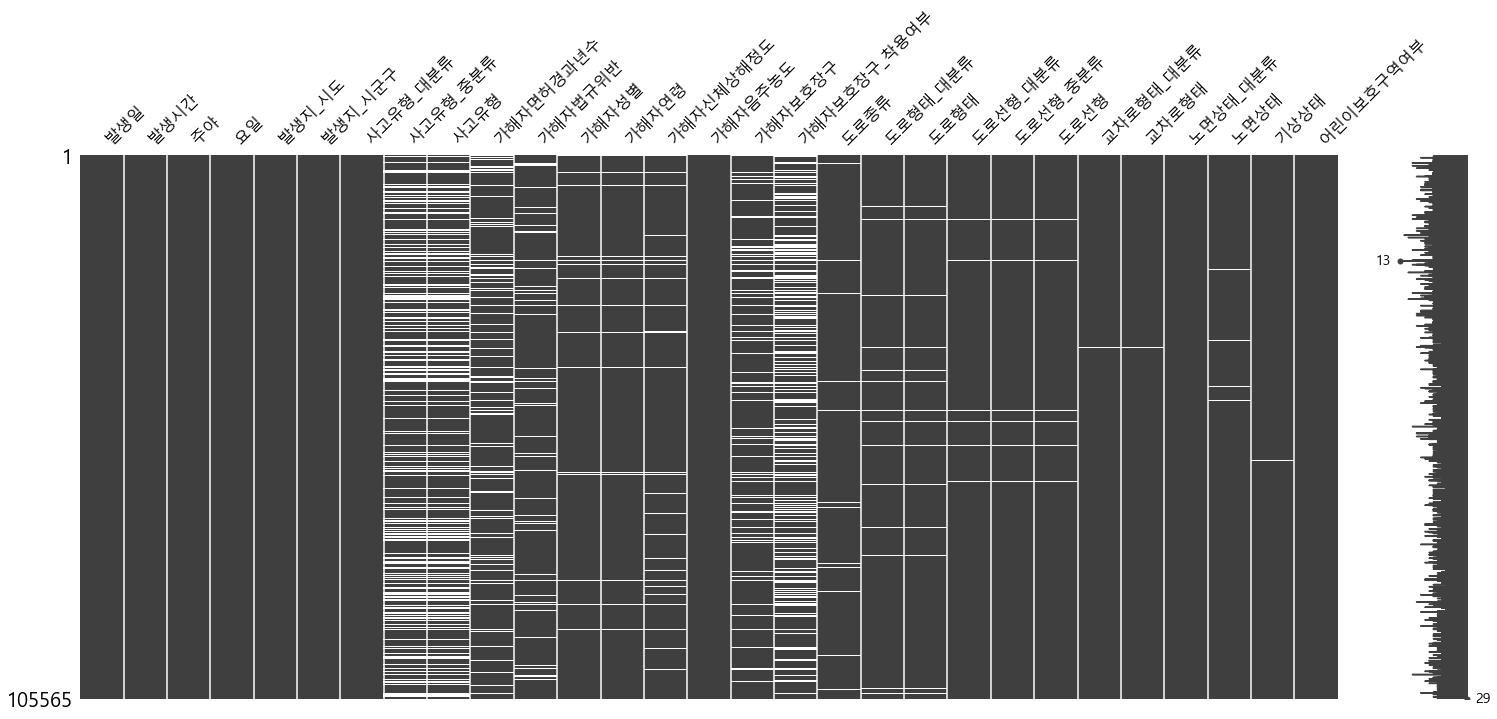

In [ ]:
msno.matrix(data)

In [ ]:
data.isnull().mean()

발생일             0.000000
발생시간            0.000000
주야              0.000000
요일              0.000000
발생지_시도          0.000000
발생지_시군구         0.000000
사고유형_대분류        0.000000
사고유형_중분류        0.274883
사고유형            0.274883
가해자면허경과년수       0.122740
가해자법규위반         0.078151
가해자성별           0.010865
가해자연령           0.010543
가해자신체상해정도       0.028551
가해자음주농도         0.001250
가해자보호장구         0.094861
가해자보호장구_착용여부    0.296339
도로종류            0.027017
도로형태_대분류        0.028542
도로형태            0.028542
도로선형_대분류        0.009056
도로선형_중분류        0.009056
도로선형            0.009056
교차로형태_대분류       0.001667
교차로형태           0.001667
노면상태_대분류        0.000000
노면상태            0.010733
기상상태            0.006252
어린이보호구역여부       0.000000
dtype: float64

이 중 '가해자보호장구_착용여부'는 추가조사를 위해 놔둔다. (나중에 이유 나옴)

나머지 missing values들은 mode 혹은 Backward-fill과 같은 방법으로 값을 대체하기에는 양이 너무 많은 경우도 있다. KNN (K Nearest Value), random forest와 같은 Machine Learning 알고리즘으로 Missing values를 채우는 방법이 있다. 하지만 이 분석에서는 linear regression을 통한 imputation 혹은 '기타'라는 categorical value로 생각하고 진행한다. 이 분석은 각 feature이 사망률에 주는 영향의 추세를 보기위함이기 때문이다.

In [ ]:
data = data.drop(['사고유형_중분류', '사고유형'], axis=1)

##### 4. Dependent Variable Modification & Analysis

Dependent Variable인 '가해자신체상해정도'가 사망여부만 나타낼 수 있도록 사망이면 1, 아니면 0 으로 바꿔준다. 이름도 '사망여부' 로 변경해주자.

In [ ]:
data.rename(columns = {'가해자신체상해정도':'사망여부'}, inplace = True)
data['사망여부'].value_counts(dropna=False)

상해없음    35157
경상      28475
중상      19428
부상신고    16683
NaN      3014
사망       2808
Name: 사망여부, dtype: int64

NaN은 우선 제외하고 분석한다. 추후에 Machine Learning으로 알아낼 수 있으면 알아내보자.

In [ ]:
data['사망여부'].replace(['상해없음', '경상', '중상', '부상신고', np.NaN, '사망'], [0,0,0,0,0,1], inplace=True)
data['사망여부'].value_counts(dropna=False)

0    102757
1      2808
Name: 사망여부, dtype: int64

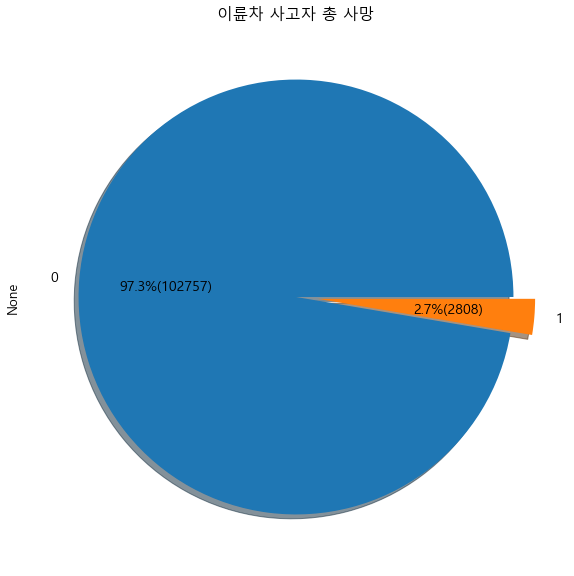

In [ ]:
dsum = data.groupby('사망여부').size()
dsum.plot(kind='pie',
          explode=[0,0.1],
          figsize=(10,10), 
          autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*dsum.sum()),
          shadow=True,
          textprops={'fontsize': 14})
plt.title('이륜차 사고자 총 사망')
plt.show()

전체 사고 중 사망자는 2.7%.

In [ ]:
#profile = ProfileReport(data, title = '사고')
#profile.to_widgets()

## <font color = 'gold'>4 Analyze (EDA)</font>

### 1. Feature 종류 별 분석

각 feature을 분류하고 해당 dtype에 맞게 수정한다.

1. Numerical Features: 
- Discrete: 발생일, 요일, 발생시간(주야), 가해자면허경과년수, 가해자연령 <br/><br/>

2. Categorical Features:
- Nominal: 가해자성별, [가해자보호장구, 가해자보호장구_착용여부], 거해자법규위반, 사망여부, [발생지_시도, 발생지_시군구], [사고유형_대분류, 사고유형_중분류, 사고유형], 도로종류, [도로형태_대분류, 도로형태],[도로선형_대분류, 도로선형_중분류, 도로선형], [교차로형태_대분류, 교차로형태], [노면상태_대분류, 노면상태], 기상상태, 어린이보호구역여부
- Ordinal: 가해자음주농도

** 요일은 Numerical Feature이라고 보기 애매하지만, '발생일' 및 '발생시간'과 연관이 있어 같이 분석해준다. </p>
** 가해자는 이륜차 운전자를 뜻한다.

#### 1) Numerical Feature

##### 1. 발생일

연도별로 사망자를 파악해보자. 

- '발생일'의 dtype을 datetime64 형태로 변경한다.
- '발생일'을 '년'과 '월'로 나눈다.

In [ ]:
data['발생일'] = data['발생일'].astype('datetime64')
data['년'] = data['발생일'].dt.year
data['월'] = data['발생일'].dt.month

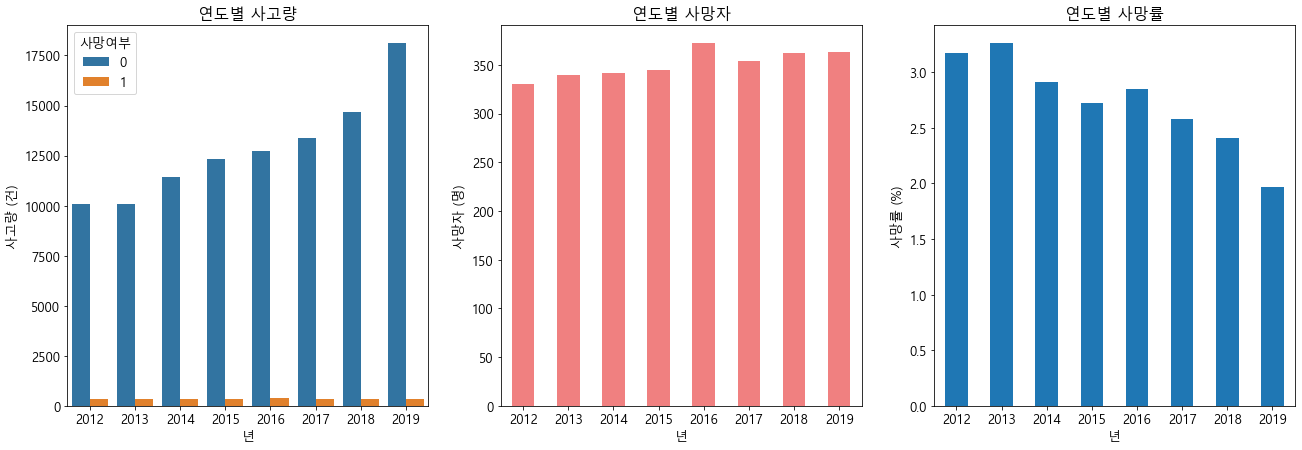

In [ ]:
f,ax=plt.subplots(1,3,figsize=(22,7))

sns.countplot('년', hue='사망여부', data=data, ax=ax[0])
ax[0].set_title('연도별 사고량')
ax[0].set_ylabel('사고량 (건)')

data[['년', '사망여부']].groupby('년').sum().plot.bar(ax=ax[1], color='lightcoral')
ax[1].set_title('연도별 사망자')
ax[1].set_ylabel('사망자 (명)')
ax[1].get_legend().remove()
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

(data[['년', '사망여부']].groupby('년').mean()*100).plot.bar(ax=ax[2])
ax[2].set_title('연도별 사망률')
ax[2].set_ylabel('사망률 (%)')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)
ax[2].get_legend().remove()

plt.show()

- 사고량 증가 대비 사망인원 증가는 미미하다. 결과적으로 연도별 사망률이 줄어든다.
- 해석: 해가 갈수록 사고량을 증가시킨 이륜차의 사용용도가 사망사고로 덜 이어지는 특성을 가지고 있어서 그런 것 같다. 주로 배달용 오토바이로 보고 있다. 추가적인 조사가 필요하다.</p>

이제 월별 사망률을 비교해 보자.

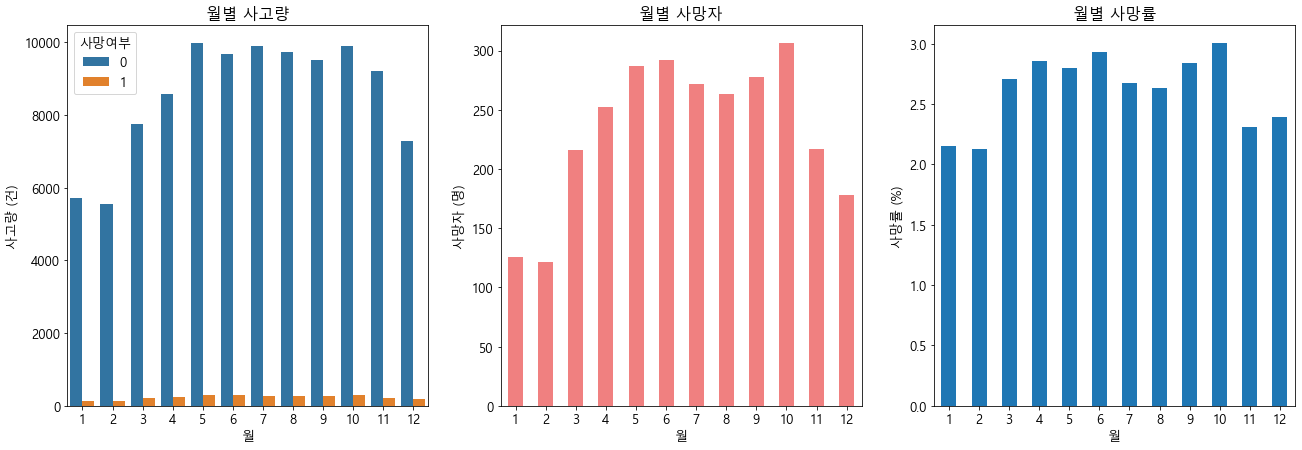

In [ ]:
f,ax=plt.subplots(1,3,figsize=(22,7))

sns.countplot('월', hue='사망여부', data=data, ax=ax[0])
ax[0].set_title('월별 사고량')
ax[0].set_ylabel('사고량 (건)')

data[['월', '사망여부']].groupby('월').sum().plot.bar(ax=ax[1], color='lightcoral')
ax[1].set_title('월별 사망자')
ax[1].set_ylabel('사망자 (명)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)
ax[1].get_legend().remove()

(data[['월', '사망여부']].groupby('월').mean()*100).plot.bar(ax=ax[2])
ax[2].set_title('월별 사망률')
ax[2].set_ylabel('사망률 (%)')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)
ax[2].get_legend().remove()

plt.show()

- 보통 3~10월 사이에 사고량이 많고 사망률이 높다.
- 해석: 12~2월 까지는 겨울이므로 춥고 노면상태도 좋지 않아 속도를 줄이고 운행을 조심히 하는 것 같다. 또한 이 시기에는 생계형 이륜차 운행자들이 다수 일 것 같으므로 능숙한 운전자들일 확률이 높다.

이제 요일별 사망률을 비교해보자.

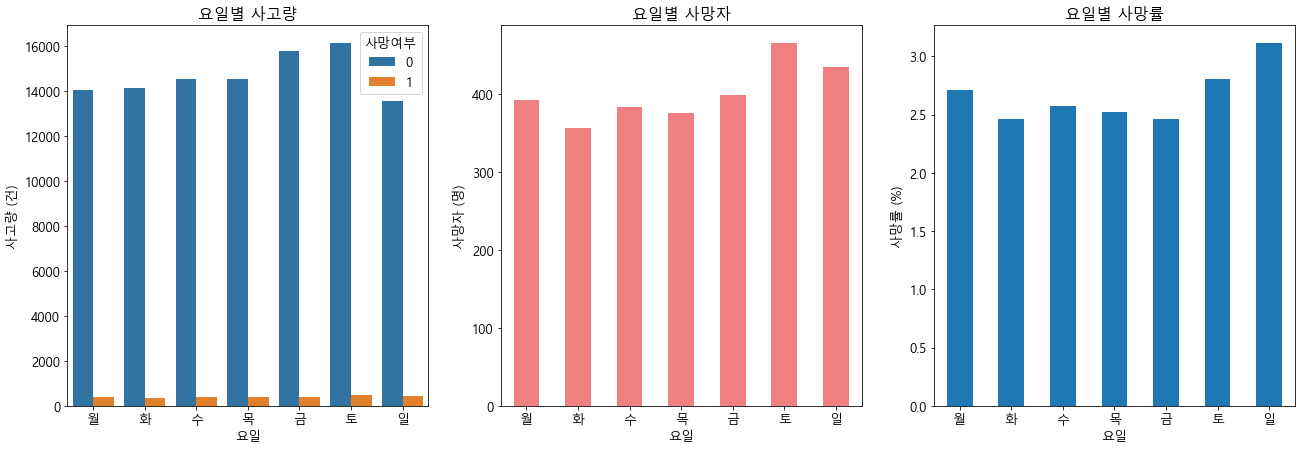

In [ ]:
f,ax=plt.subplots(1,3,figsize=(22,7))
order = ["월", "화", "수", "목", "금", "토", "일"]

sns.countplot('요일', hue='사망여부', data=data, order=order, ax=ax[0])
ax[0].set_title('요일별 사고량')
ax[0].set_ylabel('사고량 (건)')

data[['요일', '사망여부']].groupby('요일').sum().loc[order].plot.bar(ax=ax[1], color='lightcoral')
ax[1].set_title('요일별 사망자')
ax[1].set_ylabel('사망자 (명)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)
ax[1].get_legend().remove()

(data[['요일', '사망여부']].groupby('요일').mean()*100).loc[order].plot.bar(ax=ax[2])
ax[2].set_title('요일별 사망률')
ax[2].set_ylabel('사망률 (%)')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)
ax[2].get_legend().remove()

plt.show()

- 주말인 토요일과 일요일에 사망률이 가장 높게 나타난다.
- 해석: 고배기량에 고속으로 운행되는 레져용 이륜차의 통행이 늘어서 그럴 것 같다. 정확히 알기 위해선 요일별 이륜차 평균 속도 및 배기량별 운행 대수 등의 추가 데이터를 봐야 한다.

다음으로 넘어가기전에 정리정돈을 위해 열의 순서를 바꿔주자.

In [ ]:
list(data.columns.values)

['발생일',
 '발생시간',
 '주야',
 '요일',
 '발생지_시도',
 '발생지_시군구',
 '사고유형_대분류',
 '가해자면허경과년수',
 '가해자법규위반',
 '가해자성별',
 '가해자연령',
 '사망여부',
 '가해자음주농도',
 '가해자보호장구',
 '가해자보호장구_착용여부',
 '도로종류',
 '도로형태_대분류',
 '도로형태',
 '도로선형_대분류',
 '도로선형_중분류',
 '도로선형',
 '교차로형태_대분류',
 '교차로형태',
 '노면상태_대분류',
 '노면상태',
 '기상상태',
 '어린이보호구역여부',
 '년',
 '월']

In [ ]:
data = data[['년', '월', '발생시간', '주야', '요일', '발생지_시도', '발생지_시군구', '사고유형_대분류', '가해자면허경과년수', '가해자법규위반', '가해자성별', '가해자연령', '사망여부', '가해자음주농도', '가해자보호장구', '가해자보호장구_착용여부', '도로종류', '도로형태_대분류', '도로형태', '도로선형_대분류', '도로선형_중분류', '도로선형', '교차로형태_대분류', '교차로형태', '노면상태_대분류', '노면상태', '기상상태', '어린이보호구역여부']]
data

,년,월,발생시간,주야,요일,발생지_시도,발생지_시군구,사고유형_대분류,가해자면허경과년수,가해자법규위반,...,도로형태,도로선형_대분류,도로선형_중분류,도로선형,교차로형태_대분류,교차로형태,노면상태_대분류,노면상태,기상상태,어린이보호구역여부
0,2012,1,00:00,야,일,경기,안산시,차대차,1년미만,안전운전 의무 불이행,...,NaN,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N
1,2012,1,00:00,야,일,경기,하남시,차대차,4년미만,안전운전 의무 불이행,...,기타단일로,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N
2,2012,1,00:00,야,일,경북,칠곡군,차량단독,NaN,안전운전 의무 불이행,...,기타단일로,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N
3,2012,1,01:00,야,일,서울,종로구,차대차,3년미만,안전거리 미확보,...,교차로부근,직선,직선,평지,교차로,교차로 - 사지,포장,건조,맑음,N
8,2012,1,06:00,주,일,대구,달서구,차대차,15년이상,신호위반,...,교차로내,직선,직선,평지,교차로,교차로 - 사지,포장,건조,맑음,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146119,2019,12,21:00,야,화,충북,청주시,차대차,2년미만,안전운전 의무 불이행,...,기타단일로,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N
146120,2019,12,21:00,야,화,충북,청주시,차대차,15년이상,안전운전 의무 불이행,...,기타단일로,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N
146123,2019,12,22:00,야,화,경기,성남시,차대차,15년이상,NaN,...,교차로내,직선,직선,평지,교차로,교차로 - 사지,포장,건조,맑음,N
146124,2019,12,22:00,야,화,경기,수원시,차대차,5년미만,안전거리 미확보,...,기타단일로,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N


##### 2. 발생시간

시간별 사망률을 분석해보자.

- '발생시간'을 '시간'으로 개명해준다
- '시간'의 dtype을 datetime64로 바꾸고 시간 단위만로만 나타낸 후 분석을 해보자.

In [ ]:
data.rename(columns = {'발생시간':'시간'}, inplace=True)
data['시간'] = pd.to_datetime(data['시간'], format='%H:%M')
data['시간'] = data['시간'].dt.hour

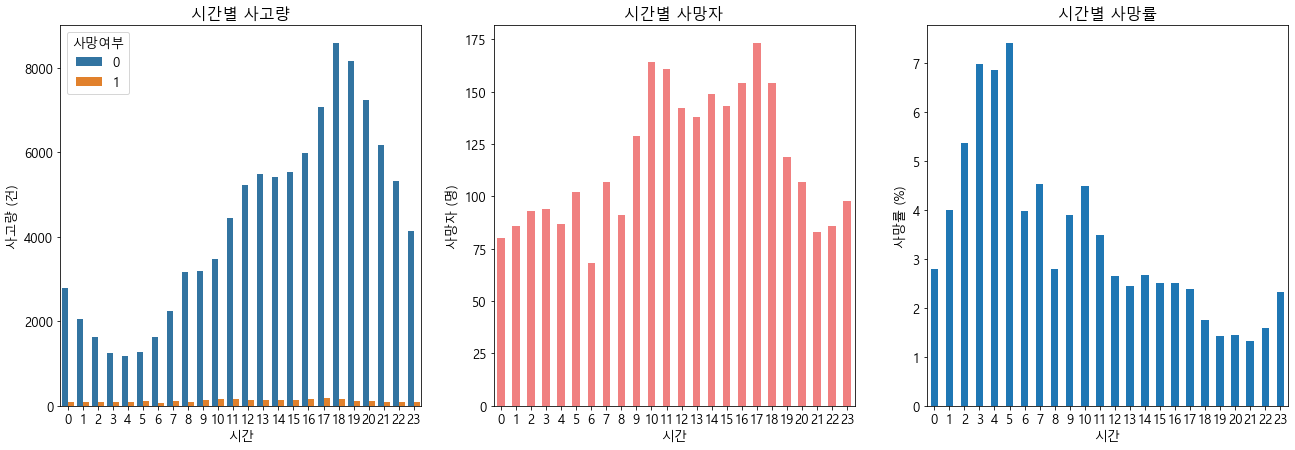

In [ ]:
f,ax=plt.subplots(1,3,figsize=(22,7))

sns.countplot('시간', hue='사망여부', data=data, ax=ax[0])
ax[0].set_title('시간별 사고량')
ax[0].set_ylabel('사고량 (건)')

data[['시간', '사망여부']].groupby('시간').sum().plot.bar(ax=ax[1], color='lightcoral')
ax[1].set_title('시간별 사망자')
ax[1].set_ylabel('사망자 (명)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)
ax[1].get_legend().remove()

(data[['시간', '사망여부']].groupby('시간').mean()*100).plot.bar(ax=ax[2])
ax[2].set_title('시간별 사망률')
ax[2].set_ylabel('사망률 (%)')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)
ax[2].get_legend().remove()

plt.show()


- 새벽 시간(특히 3~5시)에 사고량이 가장 적은데, 사망률은 가장 높다. 저녁 시간(19~21시)에는 그 반대다.
- 해석: 두 시간대에 사망자 수가 비슷한 걸 보면 확실히 새벽시간이 더 위험다.

##### 3. 가해자면허경과년수


'가해자면허경과년수'별 사망률을 알아본다. 

- '가해자면허경과년수'를 '면허경과년수'로 개명해준다.
- '면허경과년수'의 값들을 알아보자.

In [ ]:
data.rename(columns={'가해자면허경과년수':'면허경과년수'}, inplace=True)
data['면허경과년수'].value_counts(dropna=False, normalize=True)

15년이상    0.328063
10년미만    0.133378
1년미만     0.127959
NaN      0.122740
15년미만    0.094387
2년미만     0.070705
3년미만     0.047753
4년미만     0.039511
5년미만     0.035504
Name: 면허경과년수, dtype: float64

- 해당 값들을 크게 5개의 bin["0~4", "5~9", "10~14", "15~", "미상"]으로 나누어 비교를 해볼 생각이다.
- '면허경과년수'와 '사망여부'만 나오는 데이터 프레임을 만든 후, 연차를 5년 주기로 나눠준다.

In [ ]:
data['면허경과년수'] = data['면허경과년수'].replace(['1년미만','2년미만','3년미만','4년미만','5년미만','10년미만','15년미만','15년이상',np.NaN],['1~4', '1~4', '1~4', '1~4', '1~4', '5~9', '10~14', '15~','미상'])
data['면허경과년수'].value_counts(normalize=True)

15~      0.328063
1~4      0.321432
5~9      0.133378
미상       0.122740
10~14    0.094387
Name: 면허경과년수, dtype: float64

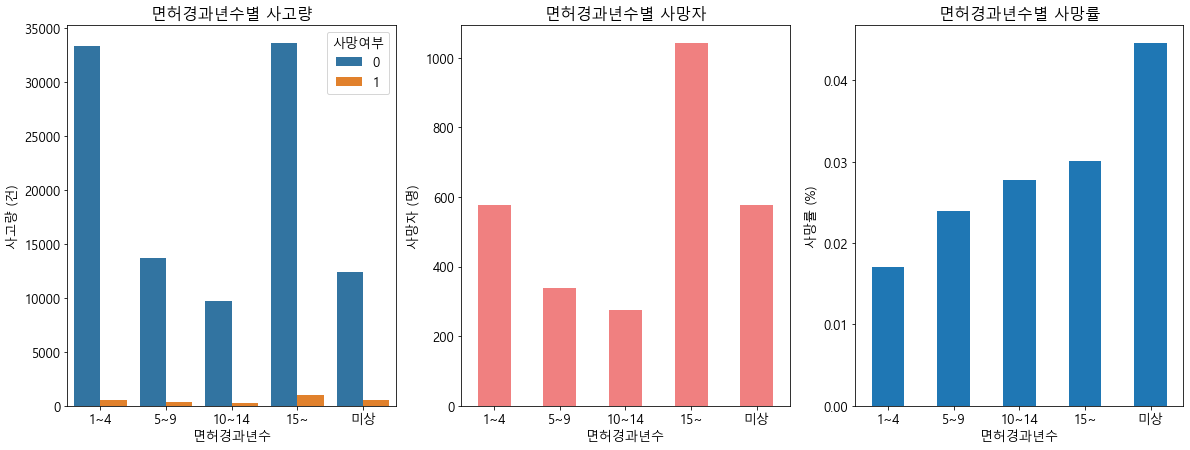

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,7))
order = ["1~4", "5~9", "10~14", "15~", "미상"]

sns.countplot('면허경과년수', hue='사망여부', data=data, order=order, ax=ax[0])
ax[0].set_title('면허경과년수별 사고량')
ax[0].set_ylabel('사고량 (건)')

data[['면허경과년수', '사망여부']].groupby('면허경과년수').sum().loc[order].plot.bar(ax=ax[1], color='lightcoral')
ax[1].set_title('면허경과년수별 사망자')
ax[1].set_ylabel('사망자 (명)')
ax[1].get_legend().remove()
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

data[['면허경과년수', '사망여부']].groupby('면허경과년수').mean().loc[order].plot.bar(ax=ax[2])
ax[2].set_title('면허경과년수별 사망률')
ax[2].set_ylabel('사망률 (%)')
ax[2].get_legend().remove()
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)

plt.draw()


- 사망률은 "미상"을 제외하면 년수가 올라갈수록 증가한다.
- 하지만 "미상"의 사망자수가 무시하지 못 할 정도로 많아서 drop하거나 mean이나 mode로 대체하면 실제 사망률에 영향을 주게 된다. 
- 결론적으로 본 데이터로는 '면허경과년수'가 실제 사망률에 미치는 영향을 정확히 판단하기 어렵지만, 년수가 증가할수록 사망률이 늘지 않을까 조심히 예상해본다. 

##### 4. 가해자연령

가해자연령대별 사망률을 알아보자.

- '가해자연령'을 '연령'으로 개명한다.
- '사망여부'만 나오는 data frame의 값들을 보자.

In [ ]:
data.rename(columns={'가해자연령':'연령'}, inplace=True)
data['연령']=data['연령'].str.replace('세','')
data.연령.unique()

array(['16', '21', '36', '18', '71', '17', '30', '57', '43', '74', '69',
       '42', '47', nan, '46', '50', '54', '27', '67', '31', '62', '22',
       '56', '38', '37', '77', '82', '29', '20', '41', '51', '55', '59',
       '45', '14', '26', '68', '52', '19', '25', '35', '84', '65', '15',
       '61', '53', '28', '60', '23', '40', '44', '34', '32', '70', '39',
       '48', '33', '76', '78', '24', '49', '12', '66', '58', '64', '63',
       '73', '79', '75', '80', '72', '83', '81', '91', '85', '86', '13',
       '88', '90', '89', '10', '8', '95', '87', '93', '92', '96', '94',
       '11', '7', '9', '98', '97', '114', '99', '119'], dtype=object)

NaN의 갯수를 세어보자.

In [ ]:
data['연령'].isnull().sum()

1113

'연령' 중 NaN인 값은 1%정도 된다. 적음으로 그냥 진행해보자

NaN은 총 1% 정도이므로 해당 행들을 지워도 해당 feature 분석에는 큰 영향을 미치지 않는다.
- NaN 값들을 제거해준다.
- object인 '연령' 값들을 int64로 변경해준다.

In [ ]:
dage = data
dage = dage.dropna(subset=['연령'], axis=0)
dage['연령']=dage['연령'].astype('int64')
dage['연령'].isnull().sum()

0

In [ ]:
dage['연령'].count()

104452

10년 주기로 연령들을 나눠 본다.

In [ ]:
bins = np.linspace(0, 120, 13)
bins

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120.])

In [ ]:
bins = np.linspace(0, 120, 13)
group_names = [0,10,20,30,40,50,60,70,80,90,100,110]
dage['연령'] = pd.cut(dage['연령'], bins, labels=group_names, include_lowest=True)
dage['연령'].value_counts()

10     24280
20     21824
30     14503
40     12709
50     12273
60      8798
70      8118
80      1878
90        62
0          5
110        2
100        0
Name: 연령, dtype: int64

0, 100, 110은 값의 갯수가 너무 적어서 제외한다.

In [ ]:
exclude = (0,100,110)
dage = dage[~(dage['연령'].isin(exclude))]
dage['연령'].value_counts()

10     24280
20     21824
30     14503
40     12709
50     12273
60      8798
70      8118
80      1878
90        62
0          0
100        0
110        0
Name: 연령, dtype: int64

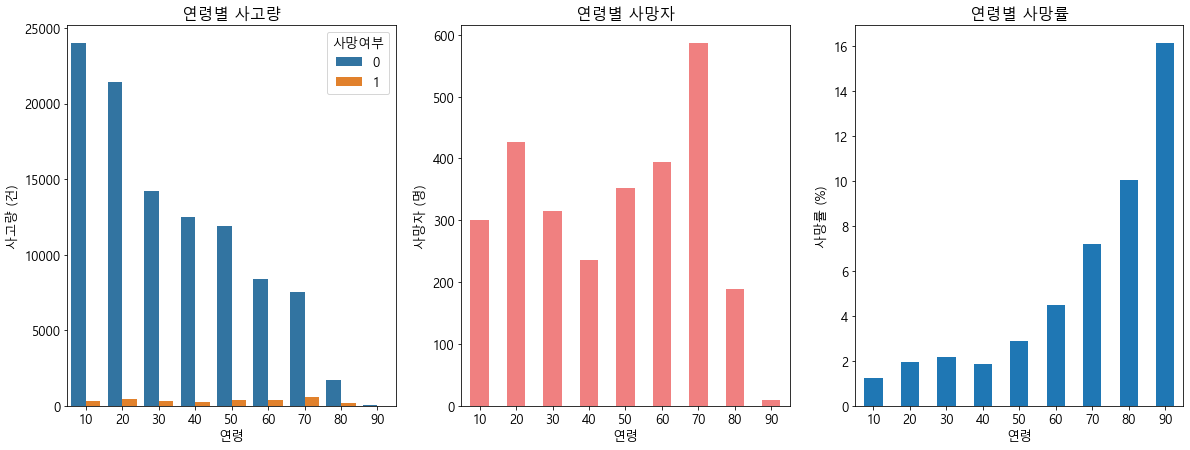

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,7))
order=[10,20,30,40,50,60,70,80,90]

sns.countplot('연령', hue='사망여부', data=dage, order=order, ax=ax[0])
ax[0].set_title('연령별 사고량')
ax[0].set_ylabel('사고량 (건)')

dage[['연령', '사망여부']].groupby('연령').sum().loc[order].plot.bar(ax=ax[1], color='lightcoral')
ax[1].set_title('연령별 사망자')
ax[1].set_ylabel('사망자 (명)')
ax[1].get_legend().remove()
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

(dage[['연령', '사망여부']].groupby('연령').mean()*100).loc[order].plot.bar(ax=ax[2])
ax[2].set_title('연령별 사망률')
ax[2].set_ylabel('사망률 (%)')
ax[2].get_legend().remove()
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)

plt.draw()


- 10, 20대의 사고가 제일 많고 연령대가 높을수록 사고량은 줄어든다. 추가로 알아봐야겠지만, 연령이 증가할수록 이륜차 운행자 수 혹은 운행 거리가 적어져서 그런 것 같다.
- 40대를 제외하고 사망률이 점차 커진다.
- 70대 부터 사고량이 현저히 줄어드는데에 비해, 사망률이 급격히 늘어난다. 특히 70대의 사망자 수가 가장 크다. 이는 70세 이상 노년층이 이륜차 사고에 취약함을 보여준다. 운행능력 뿐 아니라 사고장소와 그 주변 교통환경에 따라 크게 영향을 받는 것으로 추측된다. 
- 해석: 크게 봐서 사고량은 연령대가 높을수록 적어지지만, 사망률은 증가한다.

#### 2) Categorical Feature

##### 1. 가해자성별

'가해자성별'을 '성별'로 바꿔주고 어떠한 값들이 있는지 알아보자.

In [ ]:
data.rename(columns={'가해자성별':'성별'}, inplace=True)
data['성별'].value_counts(dropna=False)

남      100028
여        4390
NaN      1147
Name: 성별, dtype: int64

In [ ]:
data['성별'].value_counts(dropna=False, normalize=True)

남      0.947549
여      0.041586
NaN    0.010865
Name: 성별, dtype: float64

In [ ]:
data.groupby('성별',dropna=False)['사망여부'].sum()

성별
남      2693
여       113
NaN       2
Name: 사망여부, dtype: int64

"여자"가 압도적으로 적고 NaN도 1% 다. NaN의 사망자 수도 매우 적으니 성별에 따른 사망률에 별로 영향이 없다. 제거한다.

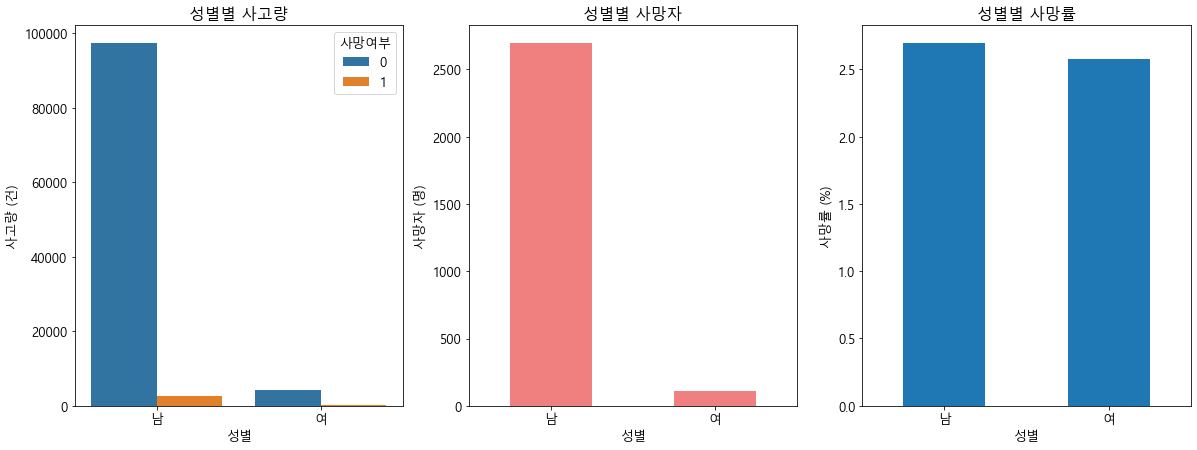

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,7))

sns.countplot('성별', hue='사망여부', data=data, ax=ax[0])
ax[0].set_title('성별별 사고량')
ax[0].set_ylabel('사고량 (건)')

data[['성별', '사망여부']].groupby('성별').sum().plot.bar(ax=ax[1], color='lightcoral')
ax[1].set_title('성별별 사망자')
ax[1].set_ylabel('사망자 (명)')
ax[1].get_legend().remove()
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

(data[['성별', '사망여부']].groupby('성별').mean()*100).plot.bar(ax=ax[2])
ax[2].set_title('성별별 사망률')
ax[2].set_ylabel('사망률 (%)')
ax[2].get_legend().remove()
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)

plt.draw()


- 여자의 사고량이 압도적으로 적다. 여성 이륜차 운전자가 적어서 그렇다.
- 사망률은 거의 비슷하지만 남자가 조금 높다.

##### 2. 가해자보호장구 및 착용여부

가해자보호장구 종류 및 착용여부에 따른 사망률의 관계를 알아보자.
- 우선 이름이 너무 길어서 바꿔준다
- 두 feature들의 값들을 보자.

In [ ]:
data = data.rename(columns={'가해자보호장구':'보호장구','가해자보호장구_착용여부':'안전모_착용여부'})
dpg = data[['보호장구', '안전모_착용여부', '사망여부']]
dpg.value_counts(dropna=False).sort_index(ascending=True)

보호장구  안전모_착용여부  사망여부
안전모   미착용       0       13538
                1         761
      착용        0       58536
                1        1447
      NaN       0       20870
                1         399
NaN   NaN       0        9813
                1         201
dtype: int64

- 여기서 '보호장구'열의 "안전모" 값 중 NaN 값은 안전모가 사고현장에서 발견되었지만 이륜차 운전자에게서 탈거된 상태로 추측해본다.
- '보호장구'열의 NaN은 어떤 보호장구인지 알 수 없으므로, 이 분석에서는 안전모에 제한하여 사망률이 어떻게 변화하는지 알아본다.

In [ ]:
dpg.dropna(subset=['보호장구'], inplace=True)
dpg['안전모_착용여부'] = dpg['안전모_착용여부'].replace(np.NaN,'불명')
dpg.value_counts(dropna=False).sort_index(ascending=True).unstack()

사망여부               0     1
보호장구 안전모_착용여부             
안전모  미착용       13538   761
     불명        20870   399
     착용        58536  1447

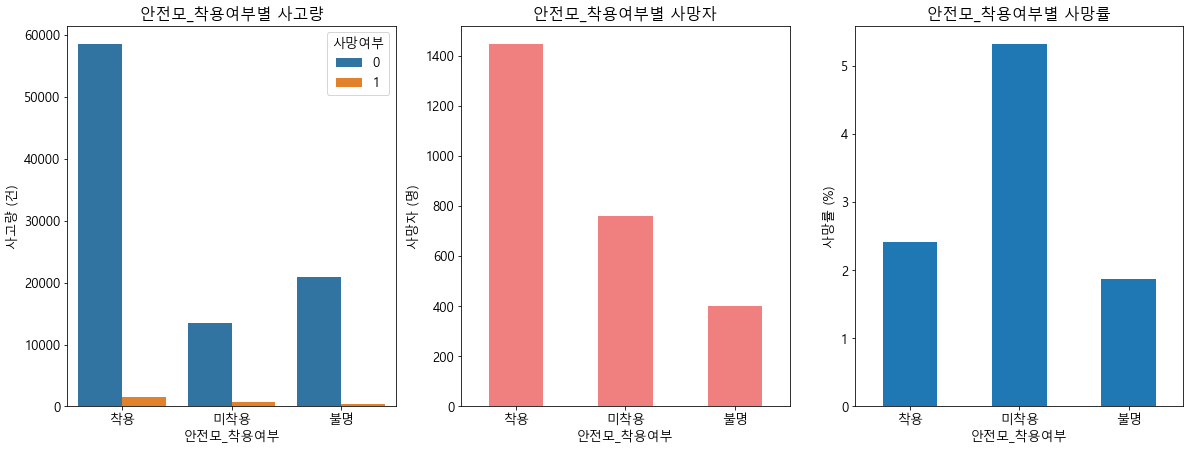

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,7))
order = ['착용', '미착용', '불명']

sns.countplot('안전모_착용여부', hue='사망여부', order=order, data=dpg, ax=ax[0])
ax[0].set_title('안전모_착용여부별 사고량')
ax[0].set_ylabel('사고량 (건)')

dpg[['안전모_착용여부', '사망여부']].groupby('안전모_착용여부').sum().loc[order].plot.bar(ax=ax[1], color='lightcoral')
ax[1].set_title('안전모_착용여부별 사망자')
ax[1].set_ylabel('사망자 (명)')
ax[1].get_legend().remove()
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

(dpg[['안전모_착용여부', '사망여부']].groupby('안전모_착용여부').mean()*100).loc[order].plot.bar(ax=ax[2])
ax[2].set_title('안전모_착용여부별 사망률')
ax[2].set_ylabel('사망률 (%)')
ax[2].get_legend().remove()
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)

plt.draw()


- 위의 차트에서는 안전모 미착용시 사망률은 2배 이상 높다고 나오나, "착용불명" 및 "기타불명"이 무시할 수 없는 크기이므로 결론을 내릴 수 없다.
- 추후에 다른 feature을 추가하여 의미있는 결과가 나오는지 보겠다.

##### 3. 사고유형

In [ ]:
data[['사고유형_대분류','사망여부']].value_counts(dropna=False).sort_index(ascending=True).unstack()

사망여부,0,1
사고유형_대분류,,
차대사람,19461,20
차대차,73731,1505
차량단독,9564,1279
철길건널목,1,4


- "철길건널목"의 수가 매우적다. 일단 분석해본다.

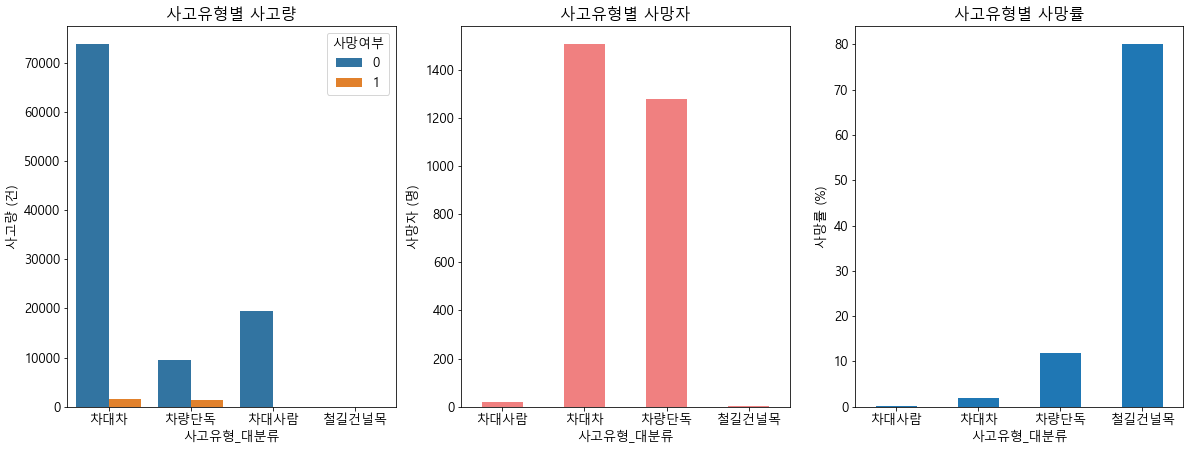

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,7))

sns.countplot('사고유형_대분류', hue='사망여부', data=data, ax=ax[0])
ax[0].set_title('사고유형별 사고량')
ax[0].set_ylabel('사고량 (건)')

data[['사고유형_대분류', '사망여부']].groupby('사고유형_대분류').sum().plot.bar(ax=ax[1], color='lightcoral')
ax[1].set_title('사고유형별 사망자')
ax[1].set_ylabel('사망자 (명)')
ax[1].get_legend().remove()
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

(data[['사고유형_대분류', '사망여부']].groupby('사고유형_대분류').mean()*100).plot.bar(ax=ax[2])
ax[2].set_title('사고유형별 사망률')
ax[2].set_ylabel('사망률 (%)')
ax[2].get_legend().remove()
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)

plt.draw()


- '사고유형_대분류'는 철길건널목, 차량단독, 차대차, 차대사람 순으로 사망률이 컸다.
- 하지만 철길 건널목의 모수가 너무 적다. 유의미하지 않다.
- 차량단독 사고가 압도적으로 많다.

In [ ]:
data[['사고유형_대분류', '사망여부']][data['사고유형_대분류'] == '차량단독'].groupby('사고유형_대분류').mean()*100

,사망여부
사고유형_대분류,
차량단독,11.795629


##### 4. 도로선형

도로선형에 따른 사망률을 알아보자. 
- '도로선형_대분류','도로선형_중분류','도로선형'의 값들을 보자.

In [ ]:
data[['도로선형_대분류','도로선형_중분류','도로선형']].value_counts(dropna=False).sort_index(ascending=False)

도로선형_대분류  도로선형_중분류  도로선형
NaN       NaN       NaN       956
커브ㆍ곡각     좌         평지       2099
                    오르막       610
                    내리막       699
          우         평지       1993
                    오르막       684
                    내리막       769
직선        직선        평지      87585
                    오르막      4625
                    내리막      5545
dtype: int64

- NaN 값이 1% 미만이므로 제외하고 분석한다.
- '도로선형_대분류'는 '도로선형_중분류'로도 충분히 커버됨으로 제외한다.

<Figure size 432x288 with 0 Axes>

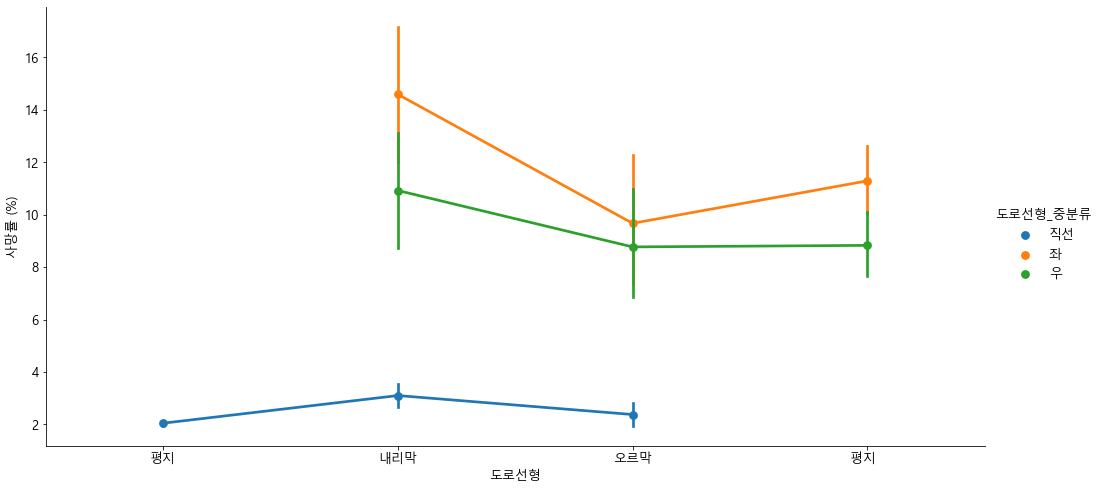

In [ ]:
dd = data[['도로선형', '도로선형_중분류', '사망여부']]
dd['사망여부'] = dd['사망여부']*100
plt.figure()
sns.factorplot('도로선형','사망여부',hue='도로선형_중분류',data=dd, size=7, aspect=2)
plt.ylabel('사망률 (%)')
plt.show()

In [ ]:
dd.groupby(['도로선형','도로선형_중분류']).mean()

사망여부
도로선형 도로선형_중분류           
내리막  우         10.923277
     좌         14.592275
     직선         3.101894
오르막  우          8.771930
     좌          9.672131
     직선         2.378378
평지   직선         2.047154
평지   우          8.830908
     좌         11.291091

- 좌회전할때 사망률이 제일 높다. 아마 많은 사람이 오른손잡이여서 그런것 같다.
- 직선도로 사고가 압도적으로 많은 것에 비해 커브를 틀때 사망률이 크게 높다.
- 특히 내리막일때 모든 방향에서 사망률이 가장 높다. 속도가 올라가고 제동이 더 힘들어서 그런 것 같다.

##### 5. 노면상태

In [ ]:
data[['노면상태_대분류', '노면상태','사망여부']].value_counts(dropna=False).sort_index(ascending=False).unstack()

사망여부                  0       1
노면상태_대분류 노면상태                  
비포장      건조       113.0     7.0
         서리/결빙      2.0     NaN
         적설         2.0     NaN
         젖음/습기     37.0     2.0
         NaN       37.0     3.0
포장       건조     92764.0  2568.0
         서리/결빙    301.0     4.0
         적설        87.0     2.0
         젖음/습기   8340.0   198.0
         침수         4.0     NaN
         해빙         1.0     NaN
         NaN     1069.0    24.0

샘플이 30개 미만인 것은 제외한다.

In [ ]:
drc = data.drop(data[(data['노면상태_대분류'] == '포장') & (data['노면상태'].str.contains('해빙|침수')==True)].index)
drc = drc.drop(drc[(drc['노면상태_대분류'] == '비포장') & (drc['노면상태'].str.contains('적설|서리/결빙')==True)].index)

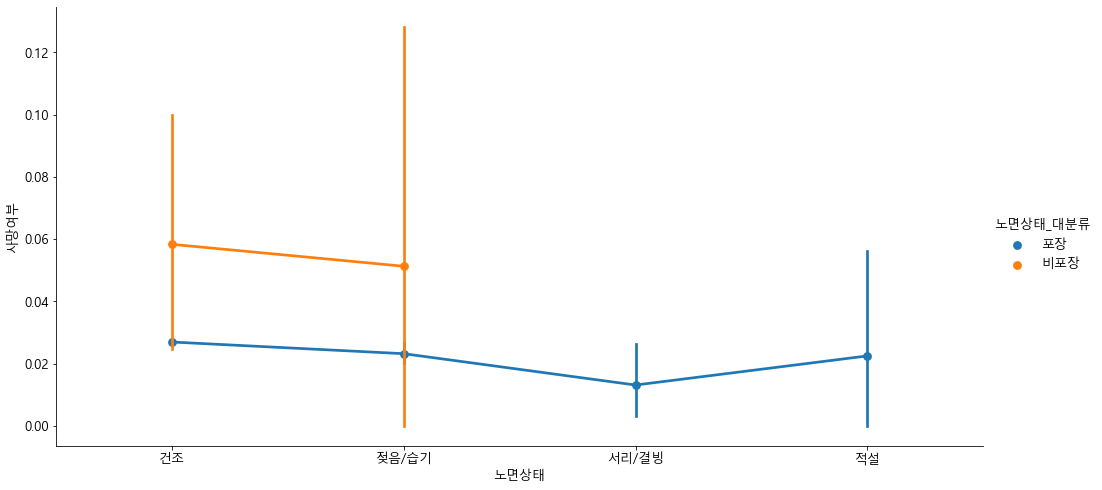

In [ ]:
sns.factorplot('노면상태','사망여부',hue='노면상태_대분류',data=drc, size=7, aspect=2)
plt.show()

- 사고는 포장도로에서 압도적으로 많이 나고 특히 건조할때 많이 발생한다. 그 다음은 젖음/습기이다. 
- 비포장도로는 건조하거나 젖음/습기 일때 포장도로에 비해 2배가랑 사망률이 크다. 
- 크게 차이는 없지만, 건조할때가 나머지 경우보다 사망률이 높다. 아마 젖었을 때 조심하기 때문일 것이다.

##### 6. 도로종류

In [ ]:
data.도로종류.value_counts(dropna=False).to_frame()

,도로종류
특별광역시도,50531
시도,30290
지방도,7591
일반국도,6524
군도,4499
이면도로,3261
NaN,2852
고속국도,17


값이 너무 작은 '고속국도'를 제외한다.

In [ ]:
dkr = data[data['도로종류'] != '고속국도']
dkr['도로종류'] = dkr['도로종류'].replace(np.NaN,'기타')

In [ ]:
dkr.groupby('도로종류')['사망여부'].mean().sort_values().to_frame()


,사망여부
도로종류,
특별광역시도,0.013714
이면도로,0.018093
시도,0.025652
기타,0.036115
지방도,0.058227
군도,0.061569
일반국도,0.069436


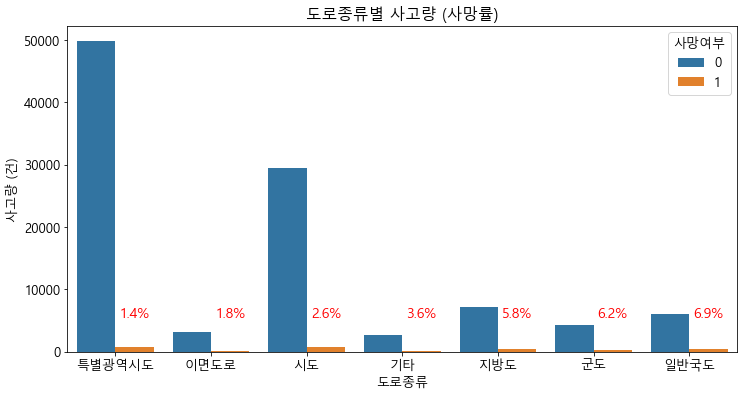

In [ ]:
f,ax=plt.subplots(figsize=(12,6))
graph1 = sns.countplot('도로종류', hue='사망여부', data=dkr, order=dkr.groupby('도로종류')['사망여부'].mean().sort_values().index)
plt.title('도로종류별 사고량 (사망률)')
plt.ylabel('사고량 (건)')

percentage = dkr.groupby('도로종류')['사망여부'].mean().sort_values()
for i in range(len(percentage)):
    graph1.text(i+0.20,(max(dkr.groupby('도로종류')['사망여부'].value_counts()))/9, "{}%".format(round(percentage[i]*100,1)),
    fontdict = dict(color = 'red', fontsize =14),
    horizontalalignment = 'center')

- 빨간글씨는 사망률을 나타낸다.
- "일반국도", "군도", "지방도" 순으로 사망률이 높다.
- 비교적 도심지역보다는 교통량이 적은 도시외부 도로들이 사망률이 2배이상 높다.
- '도로종류' 별 특징이 다를 것이다. 추가 조사가 필요하다.

##### 7. 기상상태

In [ ]:
data.기상상태.value_counts(dropna=False).sort_values()

안개        69
눈        213
NaN      660
흐림      3983
비       6367
맑음     94273
Name: 기상상태, dtype: int64

In [ ]:
dw = data
dw['기상상태'] = dw['기상상태'].replace(np.NaN,'기타')
dw.groupby('기상상태')['사망여부'].mean().sort_values()

기상상태
눈     0.018779
기타    0.019697
비     0.020732
맑음    0.026551
안개    0.028986
흐림    0.038664
Name: 사망여부, dtype: float64

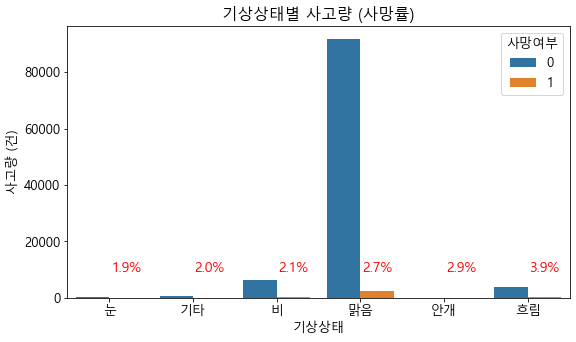

In [ ]:
f,ax=plt.subplots(figsize=(9,5))
graph = sns.countplot('기상상태', hue='사망여부', data=dw, order=dw.groupby('기상상태')['사망여부'].mean().sort_values().index)
plt.title('기상상태별 사고량 (사망률)')
plt.ylabel('사고량 (건)')

percentage = dw.groupby('기상상태')['사망여부'].mean().sort_values()
for i in range(len(percentage)):
    graph.text(i+0.20,(max(dw.groupby('기상상태')['사망여부'].value_counts()))/10, "{}%".format(round(percentage[i]*100,1)),
    fontdict = dict(color = 'red', fontsize =14),
    horizontalalignment = 'center')

- 흐림과 안개가 있을때 사망률이 가장 높다. 시야가 중요한 역할을 한다는 뜻이다.
- 눈과 비가 올때 사망율이 가장 적다. 아마도 노면상태가 안전운전에 큰 영향을 주는 것 같다.

##### 8. 어린이 보호구역 여부

In [ ]:
data.어린이보호구역여부.value_counts(dropna=False)

N    105091
Y       474
Name: 어린이보호구역여부, dtype: int64

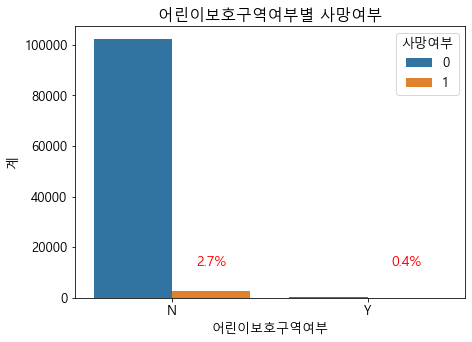

In [ ]:
f,ax=plt.subplots(figsize=(7,5))
graph = sns.countplot('어린이보호구역여부', hue='사망여부', data=data)
plt.title('어린이보호구역여부별 사망여부')
plt.ylabel('계')

percentage = data.groupby('어린이보호구역여부')['사망여부'].mean()
for i in range(len(percentage)):
    graph.text(i+0.20,(max(data.groupby('어린이보호구역여부')['사망여부'].value_counts()))/8, "{}%".format(round(percentage[i]*100,1)),
    fontdict = dict(color = 'red', fontsize =14),
    horizontalalignment = 'center')

- 어린이 보호구역에서 사고가 현저히 적게 난다.
- 사망률도 현저히 적다. 어린이보호구역은 사망률에 확실히 영향이 있다.

##### 9. 발생지

발생지별로 사망사고의 분포도를 알아보자.

In [ ]:
dlc = data.groupby('발생지_시도')['발생지_시군구'].value_counts().to_frame('count').reset_index()
dlc.rename(columns = {'발생지_시도':'시도', '발생지_시군구':'시군구'}, inplace=True)
dlc['시도'] = dlc['시도'].replace(['경남','경북','전남','전북','충남','충북'],['경상','경상','전라','전라','충청','충청'])
dlc

,시도,시군구,count
0,강원,원주시,672
1,강원,춘천시,516
2,강원,강릉시,207
3,강원,홍천군,102
4,강원,동해시,97
...,...,...,...
226,충청,괴산군,115
227,충청,영동군,97
228,충청,보은군,74
229,충청,청원군,72


'시도' 보단 '시군구'정보를 이용한다.
시군구의 위도경도 정보가 있는 데이터를 찾아서, data에다가 추가해준다.

In [ ]:
# source: https://junggam2.tistory.com/55
#mac dll = pd.read_excel('/Users/seowoongchu/Desktop/DATA SCIENCE/Test-1/Projects/Actual/3. Motorcycle Death Causes/Data/korea_administrative_division_latitude_longitude.xlsx') # 한글 encoding
dll = pd.read_excel('C:/Users/persi/Desktop/서웅/Data Science/Test/Projects/Actual/3. Motorcycle Death Causes/Data/korea_administrative_division_latitude_longitude.xlsx') # 한글 encoding
dll.drop(['docity'], axis=1, inplace=True)
dll.rename(columns = {'do':'시도', 'city':'시군구', 'longitude':'x', 'latitude':'y'}, inplace=True)
dll

,시도,시군구,x,y
0,강원,강릉시,128.878497,37.749136
1,강원,고성군,128.470164,38.377961
2,강원,동해시,129.116633,37.521931
3,강원,삼척시,129.167489,37.447086
4,강원,속초시,128.594167,38.204275
...,...,...,...,...
290,충청,충주시,127.928144,36.988181
291,충청,태안군,126.299975,36.742667
292,충청,한누리대로,127.289926,36.485450
293,충청,홍성군,126.662908,36.598361


data와 dll 데이터간에 시도와 시군구가 안맞는 값들이 몇 있다. 맞춰주고 데이터를 정리해주자.

In [ ]:
dll['시도'] = dll['시도'].str.replace('시', '')
dll.loc[dll['시군구'] == '옹진군', '시도'] = "인천"
dll.loc[dll['시군구'] == '남세종로', '시도'] = "세종"
dll.loc[dll['시도'] == '세종', '시군구'] = "세종시"
dlc.loc[dlc['시군구'] == '창원시(통합)', '시군구'] = "창원시"

동명의 시군구가 존재함으로, 시도와 시군구를 합쳐서 헷갈리지 않게 하자.

In [ ]:
dlc['시도군구'] = dlc.시도.str.cat(dlc.시군구)
dll['시도군구'] = dll.시도.str.cat(dll.시군구)

두 data frame이 같은 값의 시도군구만 가지고 있도록 해주자.

In [ ]:
dlc['exists'] = dlc.시도군구.isin(dll.시도군구).astype(int)
dlc.exists.value_counts()

1    231
Name: exists, dtype: int64

In [ ]:
dlc[dlc['exists'] == 0]

,시도,시군구,count,시도군구,exists


In [ ]:
dll['exists'] = dll.시도군구.isin(dlc.시도군구).astype(int)
dll.exists.value_counts()

1    233
0     62
Name: exists, dtype: int64

In [ ]:
dll['시도군구'][dll['시도군구'].duplicated(keep=False)]
dlc['시도군구'][dlc['시도군구'].duplicated(keep=False)]
dll = dll[dll.index != (107)]
dll = dll[dll.index != (108)]
dll = dll[dll['exists'] != 0]
dlc.reset_index(inplace=True)
dll.reset_index(inplace=True)
dlc.drop(columns='index', inplace=True)
dlc.drop(columns='exists', inplace=True)
dlc.reset_index(inplace=True)
dlc.drop(columns='index',inplace=True)

In [ ]:
dll.sort_values(['시도군구'], ascending=True, axis=0, inplace=True)
dll.drop(columns='index', inplace=True)
dll.drop(columns='exists',inplace=True)
dll.sort_values(['시도군구'], ascending=True, axis=0).reset_index(inplace=True)

In [ ]:
#dlc = dlc.drop(columns='exists')
#dlc.sort_values(['시도군구'], ascending=True, axis=0).reset_index(inplace=True)

In [ ]:
#dll.drop(columns='exists', inplace=True)
#dll.sort_values(['시도군구'], ascending=True, axis=0).reset_index(inplace=True)

이제 시도군구의 x 좌표와 y 좌표를 한 data frame에 나타내자

In [ ]:
dlc['x'] = dll['x']
dlc['y'] = dll['y']
dlc


,시도,시군구,count,시도군구,x,y
0,강원,원주시,672,강원원주시,128.878497,37.749136
1,강원,춘천시,516,강원춘천시,128.470164,38.377961
2,강원,강릉시,207,강원강릉시,129.116633,37.521931
3,강원,홍천군,102,강원홍천군,129.167489,37.447086
4,강원,동해시,97,강원동해시,128.594167,38.204275
...,...,...,...,...,...,...
226,충청,괴산군,115,충청괴산군,127.431119,36.549748
227,충청,영동군,97,충청영동군,127.511731,36.583997
228,충청,보은군,74,충청보은군,127.928144,36.988181
229,충청,청원군,72,충청청원군,126.299975,36.742667


<AxesSubplot:>

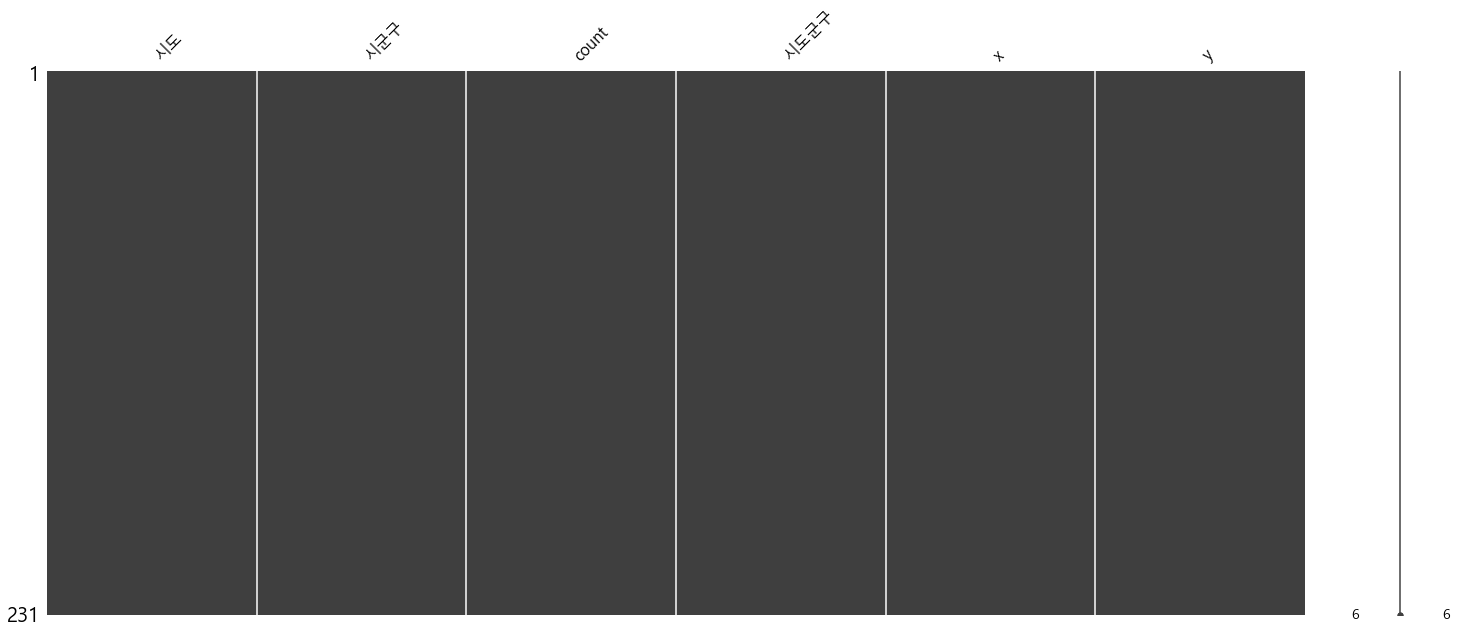

In [ ]:
msno.matrix(dlc)

원 데이터에서 발생지_시도를 바꿔줘야 하니, data frame을 복제한다.

In [ ]:
datal = data
datal['발생지_시도'] = datal['발생지_시도'].replace(['경남','경북','전남','전북','충남','충북'],['경상','경상','전라','전라','충청','충청'])
datal['시도군구'] = datal.발생지_시도.str.cat(datal.발생지_시군구)
datal.loc[datal['발생지_시군구'] == '창원시(통합)', '발생지_시군구'] = "창원시"
datal.loc[datal['시도군구'] == '경상창원시(통합)', '시도군구'] = "경상창원시"
datal

,년,월,시간,주야,요일,발생지_시도,발생지_시군구,사고유형_대분류,면허경과년수,가해자법규위반,...,도로선형_대분류,도로선형_중분류,도로선형,교차로형태_대분류,교차로형태,노면상태_대분류,노면상태,기상상태,어린이보호구역여부,시도군구
0,2012,1,0,야,일,경기,안산시,차대차,1~4,안전운전 의무 불이행,...,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N,경기안산시
1,2012,1,0,야,일,경기,하남시,차대차,1~4,안전운전 의무 불이행,...,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N,경기하남시
2,2012,1,0,야,일,경상,칠곡군,차량단독,미상,안전운전 의무 불이행,...,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N,경상칠곡군
3,2012,1,1,야,일,서울,종로구,차대차,1~4,안전거리 미확보,...,직선,직선,평지,교차로,교차로 - 사지,포장,건조,맑음,N,서울종로구
8,2012,1,6,주,일,대구,달서구,차대차,15~,신호위반,...,직선,직선,평지,교차로,교차로 - 사지,포장,건조,맑음,N,대구달서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146119,2019,12,21,야,화,충청,청주시,차대차,1~4,안전운전 의무 불이행,...,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N,충청청주시
146120,2019,12,21,야,화,충청,청주시,차대차,15~,안전운전 의무 불이행,...,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N,충청청주시
146123,2019,12,22,야,화,경기,성남시,차대차,15~,NaN,...,직선,직선,평지,교차로,교차로 - 사지,포장,건조,맑음,N,경기성남시
146124,2019,12,22,야,화,경기,수원시,차대차,1~4,안전거리 미확보,...,직선,직선,평지,교차로아님,교차로아님,포장,건조,맑음,N,경기수원시


In [ ]:
for i in datal['시도군구'].index:
    for j in dlc['시도군구'].index:
        if datal['시도군구'][i]==dlc['시도군구'][j]:
            datal.loc[i,'x'] = dlc.loc[j,'x']

In [ ]:
for i in datal['시도군구'].index:
    for j in dlc['시도군구'].index:
        if datal['시도군구'][i]==dlc['시도군구'][j]:
            datal.loc[i,'y'] = dlc.loc[j,'y']

x 좌표가 없는 행이 있나 확인해보자.

In [ ]:
datal[datal['x'].isnull()]

,년,월,시간,주야,요일,발생지_시도,발생지_시군구,사고유형_대분류,면허경과년수,가해자법규위반,...,도로선형,교차로형태_대분류,교차로형태,노면상태_대분류,노면상태,기상상태,어린이보호구역여부,시도군구,x,y


지도에 운전자가 사망한 사고 데이터만 표시하려 한다.

In [ ]:
datald = datal[datal['사망여부'] == 1]
datald['사망여부'].value_counts()

1    2808
Name: 사망여부, dtype: int64

In [ ]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [ ]:
datald

,년,월,시간,주야,요일,발생지_시도,발생지_시군구,사고유형_대분류,면허경과년수,가해자법규위반,...,도로선형,교차로형태_대분류,교차로형태,노면상태_대분류,노면상태,기상상태,어린이보호구역여부,시도군구,x,y
59,2012,1,13,주,화,전라,고창군,차대차,미상,안전운전 의무 불이행,...,평지,교차로아님,교차로아님,포장,젖음/습기,눈,N,전라고창군,127.426967,35.788719
144,2012,1,9,주,금,경기,여주시,차량단독,미상,안전운전 의무 불이행,...,평지,교차로,교차로 - 사지,포장,건조,맑음,N,경기여주시,127.035842,37.735289
224,2012,1,18,야,일,전라,장수군,차대차,미상,중앙선 침범,...,오르막,교차로아님,교차로아님,포장,건조,맑음,N,전라장수군,126.512556,33.252350
280,2012,1,14,주,화,경상,예천군,차대차,15~,안전운전 의무 불이행,...,평지,교차로,교차로 - 사지,포장,건조,맑음,N,경상예천군,128.640154,35.254003
318,2012,1,23,야,수,부산,연제구,철길건널목,5~9,NaN,...,평지,교차로아님,교차로아님,포장,건조,맑음,N,부산연제구,128.977042,35.101428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145886,2019,12,6,주,금,경상,양산시,차량단독,15~,안전운전 의무 불이행,...,오르막,교차로아님,교차로아님,비포장,NaN,맑음,N,경상양산시,129.227022,35.853169
145891,2019,12,9,주,금,경상,칠곡군,차대차,15~,중앙선 침범,...,평지,교차로아님,교차로아님,포장,건조,맑음,N,경상칠곡군,128.940775,35.970053
145901,2019,12,12,주,금,경상,김해시,차대차,미상,신호위반,...,평지,교차로,교차로 - 사지,포장,건조,맑음,N,경상김해시,126.833531,37.196817
145902,2019,12,13,주,금,경상,의성군,차대차,15~,신호위반,...,평지,교차로,교차로 - 사지,포장,건조,맑음,N,경상의성군,128.494533,35.541536


In [ ]:
fig = folium.Figure(width=1500, height=700)
latitude = 36.8
longitude = 128
korea_map = folium.Map(location = [latitude, longitude], zoom_start = 7)
incidents = plugins.MarkerCluster().add_to(korea_map)

for lat, lng, label in zip(datald.y, datald.x, datald.연령):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

fig.add_child(korea_map)

이 지도에서 사망률에 관한 정보를 알긴 힘들지만, 대도시 위주로 사망사고가 많다는 걸 알 수 있다.

시군구 중 사망률이 높은 10곳을 알아보자.

In [ ]:
death = datal.groupby(['발생지_시도', '시도군구'])['사망여부'].mean().to_frame('사망률').reset_index()
death['총 사망'] = datal.groupby(['시도군구'])['사망여부'].sum().reset_index(drop=True)
death['총 사고'] = datal.groupby(['시도군구'])['사망여부'].count().reset_index(drop=True)
death.sort_values(['사망률'], ascending=False).head(10)

,발생지_시도,시도군구,사망률,총 사망,총 사고
9,강원,강원인제군,0.468750,15,32
56,경상,경상군위군,0.208955,14,67
211,충청,충청보은군,0.202703,15,74
5,강원,강원양구군,0.200000,6,30
82,경상,경상청송군,0.192308,5,26
6,강원,강원양양군,0.189189,7,37
74,경상,경상울릉군,0.187500,3,16
216,충청,충청연기군,0.166667,1,6
16,강원,강원화천군,0.166667,7,42
212,충청,충청부여군,0.151351,28,185


시도 중 사망률이 높은 10곳을 알아보자.

In [ ]:
death2 = datal.groupby(['발생지_시도'])['사망여부'].mean().to_frame('사망률').reset_index()
death2['총 사망'] = datal.groupby(['발생지_시도'])['사망여부'].sum().reset_index(drop=True)
death2['총 사고'] = datal.groupby(['발생지_시도'])['사망여부'].count().reset_index(drop=True)
death2.sort_values(['사망률'], ascending=False).head(10)

,발생지_시도,사망률,총 사망,총 사고
8,세종,0.075556,17,225
0,강원,0.063721,137,2150
11,전라,0.058078,417,7180
13,충청,0.051241,417,8138
2,경상,0.044184,588,13308
5,대전,0.026690,45,1686
12,제주,0.026316,54,2052
1,경기,0.023919,474,19817
9,울산,0.023824,81,3400
10,인천,0.023007,73,3173


서울에서 가장 사망률이 높은 시군구 10곳을 알아보자.

In [ ]:
death[death.발생지_시도 == '서울'].sort_values('사망률',ascending=False).head(10)

,발생지_시도,시도군구,사망률,총 사망,총 사고
144,서울,서울용산구,0.017900,15,838
139,서울,서울성동구,0.017760,13,732
125,서울,서울강동구,0.015848,10,631
127,서울,서울강서구,0.015152,13,858
145,서울,서울은평구,0.014888,12,806
136,서울,서울마포구,0.014648,15,1024
138,서울,서울서초구,0.014269,12,841
134,서울,서울동대문구,0.013024,23,1766
129,서울,서울광진구,0.012500,6,480
137,서울,서울서대문구,0.011401,7,614


##### 10. 교차로 형태

In [ ]:
pd.crosstab([data.교차로형태],[data.교차로형태_대분류],margins=True).style.background_gradient(cmap='summer_r')

교차로형태_대분류,교차로,교차로아님,All
교차로형태,,,
교차로 - 사지,33566,0,33566
교차로 - 삼지,15982,0,15982
교차로 - 오지이상,1269,0,1269
교차로 - 회전,286,0,286
교차로아님,0,54286,54286
All,51103,54286,105389


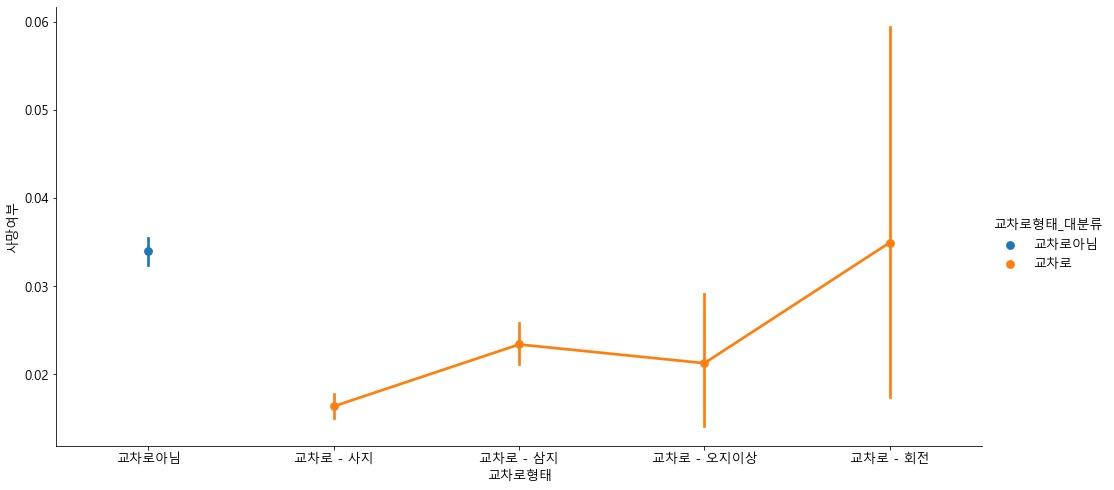

In [ ]:
sns.factorplot('교차로형태','사망여부',hue='교차로형태_대분류',data=data, size=7, aspect=2)
plt.show()

In [ ]:
data.groupby('교차로형태')['사망여부'].mean()

교차로형태
교차로 - 사지      0.016386
교차로 - 삼지      0.023401
교차로 - 오지이상    0.021277
교차로 - 회전      0.034965
교차로아님         0.033950
Name: 사망여부, dtype: float64

#### 부분 결론

0. 2012년부터 2019년까지 105565건의 이륜차 사고가 있었으며 사고시 평균 사망률은 2.7%다.
1. 년 : 해가 갈수록 사망률이 줄어든다. (2012년 3.2% -> 2019년 2%)
2. 월 : 11~2월의 사망률이 나머지 달보다 0.5%가량 작다.
3. 요일 : 주말에 사망률이 더 높다. (일요일 3%)
4. 시간 : 새벽(3~5시)에 사망률 7% 정도로 가장 높다, 19~21시가 1.5% 정도로 가장 작다.
5. 면허경과년수 : 면허경과년수가 늘수록 사망률이 커지는 경향이 있다. (자세한 추가 데이터를 봐야한다.)
6. 연령 : 나이가 들수록 사망률이 커진다. 특히 90대가 20대(사망률 2%)에 비해 8배 가량 사망률이 높다.
7. 성별 : 남녀 사망률은 여자가 2.5로 살짝 작지만, 사고건수는 남자가 압도적으로 많다.
8. 안전모 착용 : 안전모 착용이 미착용에 비해 4배가 많다. 미착용시 사망률은 2배가 크다 (사망률 5%).
9. 사고형태 : 차량단독 사망률이 11.8%로 가장 크다. 차대차와 차대사람은 비교적 작다. 철길건널목은 결론을 내기에 데이터가 너무 적다.
10. 도로선형 : 도로선형이 커브일때 사망률이 매우 크다. 특히 좌회전 할때 사망률이 가장 큰데, 내리막에서 좌회전시 사망률이 14.6%가량으로 가장 높다.
11. 노면상태 : 비포장 도로가 포장도로에 비해 사고건수는 압도적으로 적지만 사망률이 6%정도로 2배 가량 된다.
12. 도로종류 : 도심 외부도로(지방도, 군도, 일반국도)가 사고 건수는 적으나 사망률이 시내보다 2~3배 가량 크다. (일반국도 6.9%)
13. 기상 : 흐리거나 안개가 있을때 사망률이 가장 크다. 눈 혹은 비가 올때 맑음보다 사망률이 작다.
14. 어린이보호구역 : 어린이 보호구역일 때 사망률은 0.4%로 확실히 어린이보호구역이 아닌 구간(2.7%)보다 사망률이 작다.
15. 발생지 : 당연히 인구가 많은 지역일수록 사망사고가 많다.
16. 교차로 형태 : 교차로일이때 대체적으로 교차로 아닌 구간보다 사망률이 작으나, 회전 교차로일때는 사망률이 3.5%로 교차로 아닌 구간과 비슷하다.

### 2. Multiple Feature Analysis

## <font color = 'gold'>5 Modeling</font>

### 1. Train

### 2. Predict